In [10]:
import pandas as pd
import glob
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import pickle
import sklearn
import numpy as np
import nltk 
nltk.download('punkt')
nltk.download('stopwords')


# stemmer = SnowballStemmer("german")

[nltk_data] Downloading package punkt to /home/pawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
data = pd.read_csv("/home/pawan/Questionnaire_new_version.csv")

In [12]:
data

,Documents,file_name,Text,Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',..."
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '..."
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's..."
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung'
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'"
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung'
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung'


In [13]:
file_name = ['Nacaps_2018','WeGe_W2','StuMa2020','Studierdenensurvey2016','Absolventen_20092_Haupt','Promopanel_W4','Studienberechtigte_2008.3',
'Wissenschaftlerbefragung2016','Promopanel_W3','Sozialerhebung20','WeGe_W3','Promopanel_W5','sid_corona','Promopanel_W2','Absolventen_2013-2','Absolventen_20092_Promotion',
'Sozialerhebung21','Absolventen_20092_Mobilität','Sozialerhebung19']

In [14]:
GT_within_text = [['wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'vereinbarkeit von familie und beruf', 'promovierende', 'promotion', 'finanzierung', 'mobilität', 'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['Promotion', 'Arbeitsbedingungen', 'Rat', 'Weiterqualifikation', 'Weiterbildung', 'Auslandsaufenthalt'],
 [''],
 [''],
 ['Promotion','Arbeitsbedingungen', 'Rat', 'Weiterqualifikation', 'Weiterbildung', 'Auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['Promotion', 'Arbeitsbedingungen', 'Rat', 'Weiterqualifikation', 'Weiterbildung', 'Auslandsaufenthalt', 'Gesundheit'],
 ['digitale lehre', 'wohnsituation', 'finanzielle situation', 'studiensituation', 'corona'],
 ['Promotion', 'Arbeitsbedingungen', 'Rat', 'Weiterbildung', 'Auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [17]:
GT_within_text

[['wissenschaftssystem',
  'betreuung',
  'wissenschaftliche karriere',
  'vereinbarkeit von familie und beruf',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterqualifikation',
  'Weiterbildung',
  'Auslandsaufenthalt'],
 [''],
 [''],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterqualifikation',
  'Weiterbildung',
  'Auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterqualifikation',
  'Weiterbildung',
  'Auslandsaufenthalt',
  'Gesundheit'],
 ['digitale lehre',
  'wohnsituation',
  'finanzielle situation',
  'studiensituation',
  'corona'],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterbildung',
  'Auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''

In [18]:
only_keywords = []
for i in range(len(GT_within_text)):
    only_keywords.append([])
    for j in range(len(GT_within_text[i])):
        if len(GT_within_text[i][j].split(" ")) == 1:
            only_keywords[i].append(GT_within_text[i][j])

In [19]:
only_keywords

[['wissenschaftssystem',
  'betreuung',
  'promovierende',
  'promotion',
  'finanzierung',
  'mobilität',
  'gesundheit'],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['masterstudium'],
 ['evaluation', 'qualifikation', 'studiensituation'],
 [''],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterqualifikation',
  'Weiterbildung',
  'Auslandsaufenthalt'],
 [''],
 [''],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterqualifikation',
  'Weiterbildung',
  'Auslandsaufenthalt'],
 [''],
 ['geflüchtete', 'studienkolleg', 'studienvorbereitung'],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterqualifikation',
  'Weiterbildung',
  'Auslandsaufenthalt',
  'Gesundheit'],
 ['wohnsituation', 'studiensituation', 'corona'],
 ['Promotion',
  'Arbeitsbedingungen',
  'Rat',
  'Weiterbildung',
  'Auslandsaufenthalt'],
 [''],
 [''],
 [''],
 [''],
 ['']]

In [24]:
ground_truth_not_in_text = [['promotionsformen', 'promotionsmotive',  'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs','promotionsabbruch', 'strukturierte promotion', 'persönlichkeit', 'erwerbsverläufe', 'promovierte'],
                            ['integration', 'migration'], 
                            ['beruflicher verbleib von exmatrikulierten', 'studiensituation', 'studienabbruch', 'abbruchursachen'],
                            ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['studienberechtigte', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'],
                            ['hochschulforschung'],
                            ['integration', 'migration'], 
                            ['hochschulforschung'], 
                            ['internationale studierende', 'finanzielle situation', 'studienerfolg', 'erwerbstätige studierende', 'persönlichkeit', 'beeinträchtigt studierende', 'studierende', 'gesundheit', 'studierendenforschung', 'hochschulforschung'],
                            ['hochschulforschung'],
                            ['absolventen', 'hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung'], 
                            ['hochschulforschung']]

In [25]:
ground_truth_not_in_text

[['promotionsformen',
  'promotionsmotive',
  'monetäre erträge',
  'nicht-monetäre erträge',
  'wissenschaftlicher nachwuchs',
  'promotionsabbruch',
  'strukturierte promotion',
  'persönlichkeit',
  'erwerbsverläufe',
  'promovierte'],
 ['integration', 'migration'],
 ['beruflicher verbleib von exmatrikulierten',
  'studiensituation',
  'studienabbruch',
  'abbruchursachen'],
 ['effizienz, zeitreihen', 'studierendenbefragung', 'hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['studienberechtigte', 'hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['hochschulforschung'],
 ['integration', 'migration'],
 ['hochschulforschung'],
 ['internationale studierende',
  'finanzielle situation',
  'studienerfolg',
  'erwerbstätige studierende',
  'persönlichkeit',
  'beeinträchtigt studierende',
  'studierende',
  'gesundheit',
  'studierendenforschung',
  'hochschulforschung'],
 ['hochschulforschung'],
 ['absolventen', 'hochschulforschung'],
 ['ho

In [26]:
data['Valid_Ground_Truth'] = GT_within_text

In [27]:
data

,Documents,file_name,Text,Ground_Truth,Valid_Ground_Truth
0,document1,Nacaps-W1_questionnaire,"""Die Hochschule, an der Sie im Dezember 2018 z...","'wissenschaftssystem', 'betreuung', 'wissensch...","[wissenschaftssystem, betreuung, wissenschaftl..."
1,document2,WeGe_W2,"""Wie ist dieser studienvorbereitende Kurs verl...","'integration', 'geflüchtete', 'studienkolleg',...","[geflüchtete, studienkolleg, studienvorbereitung]"
2,document3,StuMa2020,"""Welchen Studienabschluss haben Sie in Ihrem l...","'beruflicher verbleib von exmatrikulierten', '...",[masterstudium]
3,document4,Studierdenensurvey2016,"""An welcher Art Hochschule studieren Sie. Univ...","'evaluation', 'qualifikation', 'effizienz', 's...","[evaluation, qualifikation, studiensituation]"
4,document5,Absolventen_2009.2_Haupt,"""Wie würden Sie Ihre derzeitige Tätigkeit bzw....",'hochschulforschung',[]
5,document6,Promopanel_W4,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...","[Promotion, Arbeitsbedingungen, Rat, Weiterqua..."
6,document7,Studienberechtigte_2008.3,"""Wie zufrieden sind Sie mit Ihrem bisherigen B...","'studienberechtigte', 'hochschulforschung'",[]
7,document8,Wissenschaftlerbefragung2016,"""In welcher Sprache möchten Sie die Befragung ...",'hochschulforschung',[]
8,document9,Promopanel_W3,"""Waren oder sind Sie seit der letzten Befragun...","'promotion', 'hochschulforschung', 'promotion'...","[Promotion, Arbeitsbedingungen, Rat, Weiterqua..."
9,document10,Sozialerhebung20,"""Welchen Abschluss streben Sie in Ihrem derzei...",'hochschulforschung',[]


In [28]:
data['Ground_Truth_Not_In_Text'] = ground_truth_not_in_text

In [29]:
file_list3 = ["/home/pawan/website_keywords_also_exist_within_thesaurus/" + elem + ".txt" for elem in file_name]                  
GT_within_thesaurus = []

for file_path in file_list3:
    with open(file_path) as f_input:
        GT_within_thesaurus.append(f_input.read())

In [30]:
GT_within_thesaurus

['Betreuung, Vereinbarkeit von Familie und Beruf, Wissenschaftlicher Nachwuchs, Promotion, Persönlichkeit, Finanzierung, Mobilität, Gesundheit, ',
 'Integration, Migration',
 'Studiensituation, Studienabbruch',
 'Evaluation, Qualifikation, Effizienz, Studiensituation, Zeitreihen, Hochschulforschung',
 'Hochschulforschung',
 'Promotion, Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung',
 'Promotion, Hochschulforschung',
 'Hochschulforschung',
 'Integration, Migration',
 'Promotion, Hochschulforschung',
 'finanzielle Situation, Studienerfolg, Persönlichkeit, Studiensituation, Gesundheit, Hochschulforschung',
 'Promotion, Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung']

In [31]:
GT_within_thesaurus_not_in_text = ['Promotion, persönlichkeit', 'integration,migration', 'studiensituation, studienabbruch', 'Effizienz, zeitreihen, hochschulforschung',
                                  'hochschulforschung','hochschulforschung', 'hochschulforschung', 'hochschulforschung', 'hochschulforschung', 'hochschulforschung',
                                   'integration,migration', 'hochschulforschung', 'finanzielle Situation, Studienerfolg, Persönlichkeit, Gesundheit Hochschulforschung', 
                                  'Hochschulforschung', 'Hochschulforschung', 'hochschulforschung', 'hochschulforschung', 'hochschulforschung','hochschulforschung']

In [32]:
GT_within_thesaurus_not_in_text

['Promotion, persönlichkeit',
 'integration,migration',
 'studiensituation, studienabbruch',
 'Effizienz, zeitreihen, hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'integration,migration',
 'hochschulforschung',
 'finanzielle Situation, Studienerfolg, Persönlichkeit, Gesundheit Hochschulforschung',
 'Hochschulforschung',
 'Hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung',
 'hochschulforschung']

In [33]:
from nltk.corpus import stopwords
stop_words = stopwords.words('german')
stop_words
print(len(stop_words))
stop_words.extend(["a","ab","können",'hs', "bzw",'abt','fuer','kuenste', 'bw','tu','kath',  "usw","eu","wiwi","soz", "nah","dsh","and","eng","wahr", "kfz", "kiel", "öl","ca", "fil", "bmbf", "monat","zofar", "sose", "ha","wi", "übt","wis","vwl","geben", "hhu","bitte","inkl", "läuft", "ggf", "ern", "te", "edv", "un","ver", "finno", "etc","ehe","kfw", "maße", "möchten", "cau", "juni", "uds", "innen", "aber","ach","acht","achte","achten","achter","achtes","ag","alle","fh","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","andere","anderen","andern","anders","au","auch","auf","aus","ausser","außer","ausserdem","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","üben","besten","bin","sein","können","bis","bisher","bist","c","d","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darüber","darum","darunter","das","dasein","daselbst","dass","daß","dasselbe","davon","davor","dazu","dazwischen","dein","deine","deinem","deiner","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","saarlandes","der","deren","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","d.h","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","dürfen","dürft","durfte","durften","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einige","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","Ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","f","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","groß","grosse","große","grossen","großen","grosser","großer","grosses","großes","gut","gute","guter","gutes","h","habe","haben","habt","hast","hat","hatte","hätte","hatten","hätten","heisst","her","heute","hier","hin","hinter","hoch","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","kleine","kleinen","kleiner","kleines","kommen","kommt","können","könnt","konnte","könnte","konnten","kurz","l",
                   "lang","lange","leicht","leide","lieber","los","m","inn","usw ","dfg","machen", "erc","macht","machte","mag","magst","mahn","man","welch", "manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","möchte","mochten","düsseldorf","mögen","möglich","mögt","morgen","muss","muß","müssen","musst","müsst","musste","mussten","n","na","nach","pogs","vater","mutter","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","Ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","Schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollte","sollten","sondern","sonst","sowie","später","statt","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","über","überhaupt","übrigens","uhr","um","und","und?","uns","unser","unsere","unserer","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","vor","w","wahr?","während","währenddem","währenddessen","wann","war","wäre","waren","wart","warum","was","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","wessen","wie","wieder","will","willst","wir","wird","wirklich","wirst","wo","wohl","wollen","wollt","wollte","wollten","worden","wurde","würde","wurden","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","euer","eure","hattest","hattet","jedes","mußt","müßt","sollst","sollt","soweit","weshalb","wieso","woher","wohin"])
print(len(stop_words))

232
890


In [34]:
# def clean_text(text, for_embedding=False):
#     """
#         - remove any html tags (< /br> often found)
#         - Keep only ASCII + European Chars and whitespace, no digits
#         - remove single letter chars
#         - convert all whitespaces (tabs etc.) to single wspace
#         if not for embedding (but e.g. tdf-idf):
#         - all lowercase
#         - remove stopwords, punctuation and stemm
#     """
#     RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
#     RE_TAGS = re.compile(r"<[^>]+>")
#     RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
#     RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
# #     if for_embedding:
#         # Keep punctuation
# #         RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
# #         RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

#     text = re.sub(RE_TAGS, " ", text)
#     text = re.sub(RE_ASCII, " ", text)
#     text = re.sub(RE_SINGLECHAR, " ", text)
#     text = re.sub(RE_WSPACE, " ", text)

#     word_tokens = word_tokenize(text)
#     words_tokens_lower = [word.lower() for word in word_tokens]

#     if for_embedding:
#         # no stemming, lowering and punctuation / stop words removal
#         words_filtered = word_tokens
#     else:
#         words_filtered = [
#             word for word in words_tokens_lower if word not in stop_words
#         ] 

#     text_clean = " ".join(words_filtered)
#     return text_clean

In [35]:
def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    if for_embedding:
         #Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž.! ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            word for word in words_tokens_lower if word not in stop_words
        ] 

    text_clean = " ".join(words_filtered)
    return text_clean

In [36]:
data["clean_text"] = data["Text"].map(
    lambda x: clean_text(x, for_embedding=True) if isinstance(x, str) else x
)

In [37]:
data["clean_text"][0]

'Die Hochschule an der Sie im Dezember zur Promotion registriert waren hat ebenfalls Interesse daran mehr über die Promotionsbedingungen ihrer Promovierenden zu erfahren . Um Doppelbefragungen zu vermeiden möchten wir die von Ihnen innerhalb dieses Fragebogens angegebenen Antworten an Ihre Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung Ihr Einverständnis vorausgesetzt weiter geben . Ja ich bin mit der Weitergabe meiner Angaben an die Hochschule einverstanden . Nein ich bin mit der Weitergabe meiner Angaben an die Hochschule nicht einverstanden . Anfang Dezember waren Sie an Ihrer Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit kann sich daran etwas geändert haben . Bitte geben Sie an was aktuell auf Sie zutrifft . Ich promoviere . Ich habe das Promotionsverfahren abgeschlossen . Ich habe mein Promotionsvorhaben unterbrochen . Ich habe mein Promotionsvorhaben abgebrochen . Handelt es sich um eine offiziell der Hoch

In [38]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [39]:
#using spacy model for POS tagging

Extracted_tags=[]
for i in range(len(data["clean_text"])):
    Extracted_tags.append([])
    doc = nlp(data["clean_text"][i])
    for t in doc:
        tag=t.pos_
        if tag: # for Noun, only "NOUN"
            if t.text not in Extracted_tags:
                Extracted_tags[i].append((t.text, t.pos_))  #for appending to it as a tuples: constructing a tuple

In [40]:
Extracted_tags[1]

[('Wie', 'ADV'),
 ('ist', 'AUX'),
 ('dieser', 'DET'),
 ('studienvorbereitende', 'ADJ'),
 ('Kurs', 'NOUN'),
 ('verlaufen', 'VERB'),
 ('.', 'PUNCT'),
 ('Dieser', 'DET'),
 ('Kurs', 'NOUN'),
 ('ist', 'AUX'),
 ('noch', 'ADV'),
 ('nicht', 'PART'),
 ('beendet', 'VERB'),
 ('und', 'CCONJ'),
 ('ich', 'PRON'),
 ('besuche', 'VERB'),
 ('Ihn', 'PRON'),
 ('zurzeit', 'ADV'),
 ('weiterhin', 'ADV'),
 ('.', 'PUNCT'),
 ('Dieser', 'DET'),
 ('Kurs', 'NOUN'),
 ('ist', 'AUX'),
 ('beendet', 'VERB'),
 ('und', 'CCONJ'),
 ('ich', 'PRON'),
 ('habe', 'AUX'),
 ('an', 'ADP'),
 ('einer', 'DET'),
 ('Sprachprüfung', 'NOUN'),
 ('für', 'ADP'),
 ('den', 'DET'),
 ('Hochschulzugang', 'NOUN'),
 ('.', 'PUNCT'),
 ('DSH', 'PROPN'),
 ('oder', 'CCONJ'),
 ('TestDAF', 'PROPN'),
 ('oder', 'CCONJ'),
 ('einer', 'DET'),
 ('Feststellungsprüfung', 'NOUN'),
 ('eines', 'DET'),
 ('Studienkollegs', 'NOUN'),
 ('teilgenommen', 'VERB'),
 ('.', 'PUNCT'),
 ('Dieser', 'DET'),
 ('Kurs', 'NOUN'),
 ('ist', 'AUX'),
 ('beendet', 'VERB'),
 ('aber', 'ADV'

In [41]:
from germalemma import GermaLemma
lemmatizer = GermaLemma()
lemmatized_words = []
nlp = spacy.load('de_core_news_lg')

for i in range(len(Extracted_tags)):
    lemmatized_words.append([])
    lemma_spacy = nlp(data["clean_text"][i])
    for j in range(len(lemma_spacy)):
        token = lemma_spacy[j]
        if token.pos_ not in ['NOUN','ADJ','VERB','ADV']:
            lemmatized_words[i].append(token.lemma_)
        else:
            temp = Extracted_tags[i][j][1]
            lemmatized_words[i].append(lemmatizer.find_lemma(Extracted_tags[i][j][0], Extracted_tags[i][j][1]))


In [42]:
lemmatized_words[0]

['der',
 'Hochschule',
 'an',
 'der',
 'ich',
 'im',
 'Dezember',
 'zur',
 'Promotion',
 'registrieren',
 'sein',
 'haben',
 'ebenfalls',
 'Interesse',
 'daran',
 'mehr',
 'über',
 'der',
 'Promotionsbedingung',
 'sich',
 'Promovierenden',
 'zu',
 'erfahren',
 '.',
 'um',
 'Doppelbefragung',
 'zu',
 'vermeiden',
 'mögen',
 'ich',
 'der',
 'von',
 'ich',
 'innerhalb',
 'dies',
 'Fragebogen',
 'angegeben',
 'Antwort',
 'an',
 'mein',
 'Hochschule',
 'zum',
 'Zweck',
 'der',
 'Qualitätssicherung',
 'und',
 'Evaluation',
 'im',
 'Bereich',
 'der',
 'Doktorandenausbildung',
 'mein',
 'Einverständnis',
 'voraussetzen',
 'weiter',
 'geben',
 '.',
 'Ja',
 'ich',
 'sein',
 'mit',
 'der',
 'Weitergabe',
 'sich',
 'Angabe',
 'an',
 'der',
 'Hochschule',
 'einverstand',
 '.',
 'Nein',
 'ich',
 'sein',
 'mit',
 'der',
 'Weitergabe',
 'sich',
 'Angabe',
 'an',
 'der',
 'Hochschule',
 'nicht',
 'einverstand',
 '.',
 'Anfang',
 'Dezember',
 'sein',
 'ich',
 'an',
 'sich',
 'Hochschule',
 'offiziell',


In [43]:
# converting the list of tokens into string
lemmatized_corpus = [' '.join(x) for x in lemmatized_words]
print(lemmatized_corpus[0]) 

der Hochschule an der ich im Dezember zur Promotion registrieren sein haben ebenfalls Interesse daran mehr über der Promotionsbedingung sich Promovierenden zu erfahren . um Doppelbefragung zu vermeiden mögen ich der von ich innerhalb dies Fragebogen angegeben Antwort an mein Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung mein Einverständnis voraussetzen weiter geben . Ja ich sein mit der Weitergabe sich Angabe an der Hochschule einverstand . Nein ich sein mit der Weitergabe sich Angabe an der Hochschule nicht einverstand . Anfang Dezember sein ich an sich Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit können sich daran etwas ändern haben . Bitte geben ich an was aktuell auf ich zutreffen . Ich promovieren . Ich habe der Promotionsverfahren abschließen . Ich habe meinen Promotionsvorhaben unterbrechen . Ich habe meinen Promotionsvorhaben abbrechen . handeln ich sich um einen offiziell der Hochschule gemeldet Unter

In [44]:
#adding column to the dataframe
data['clean_text_w_lemma'] = lemmatized_corpus

In [45]:
data['clean_text_w_lemma'][0]

'der Hochschule an der ich im Dezember zur Promotion registrieren sein haben ebenfalls Interesse daran mehr über der Promotionsbedingung sich Promovierenden zu erfahren . um Doppelbefragung zu vermeiden mögen ich der von ich innerhalb dies Fragebogen angegeben Antwort an mein Hochschule zum Zweck der Qualitätssicherung und Evaluation im Bereich der Doktorandenausbildung mein Einverständnis voraussetzen weiter geben . Ja ich sein mit der Weitergabe sich Angabe an der Hochschule einverstand . Nein ich sein mit der Weitergabe sich Angabe an der Hochschule nicht einverstand . Anfang Dezember sein ich an sich Hochschule offiziell als Doktorand in registriert . In der Zwischenzeit können sich daran etwas ändern haben . Bitte geben ich an was aktuell auf ich zutreffen . Ich promovieren . Ich habe der Promotionsverfahren abschließen . Ich habe meinen Promotionsvorhaben unterbrechen . Ich habe meinen Promotionsvorhaben abbrechen . handeln ich sich um einen offiziell der Hochschule gemeldet Unte

In [46]:
#Lemmatization on the corpus text which contains all the stopwords.

#spacy model does not have a good lemmatizer as the accuracy of the model for lemmatization is 73%

# clean_text_w_lemma_w_sw = []  # clean text with lemmatization

# for words in data["clean_text"]:
#      doc = nlp(words)
#      result = ' '.join([token.lemma_ for token in doc]) 
#      clean_text_w_lemma_w_sw.append(result)

In [47]:
sample_data = (data['clean_text']).tolist()

In [48]:
# sample_data_wo_sw = (data['clean_text_wo_sw']).tolist()

In [49]:
sample_data_w_lemma= data['clean_text_w_lemma'].tolist()

In [50]:
new_df =data["clean_text_w_lemma"].str.split(expand=True).stack().value_counts().reset_index()
 
new_df.columns = ['Word', 'Frequency'] 
 
new_df

,Word,Frequency
0,.,10954
1,der,3015
2,ich,2194
3,in,1102
4,mein,996
...,...,...
5738,eröffnend,1
5739,Berufsspektrum,1
5740,Engagement,1
5741,Wusch,1


In [51]:
len(new_df)

5743

In [52]:
new_df[0:5]

,Word,Frequency
0,.,10954
1,der,3015
2,ich,2194
3,in,1102
4,mein,996


(array([10954.,     0.,  3015.,     0.,     0.,  2194.,     0.,  1102.,
            0.,   996.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

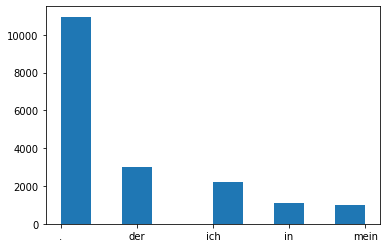

In [53]:
from matplotlib.pyplot import hist

hist(new_df[0:5].Word, weights=new_df[0:5].Frequency)

In [54]:
#Calculating Document Frequency

from collections import defaultdict
import math

DF = {}
for i in range(len(data['clean_text_w_lemma'])):
    tokens = nltk.word_tokenize(data['clean_text_w_lemma'][i]) #without nltk.word_tokenize, it gives character level DF
    for w in tokens:
            try:
                DF[w].add(i)
            except:
                DF[w] = {i}

In [55]:
len(DF) #Total Unique words

5743

In [56]:
for word,freq in DF.items():
    print(word,len(freq))

der 19
Hochschule 18
an 19
ich 19
im 19
Dezember 3
zur 17
Promotion 14
registrieren 2
sein 19
haben 19
ebenfalls 1
Interesse 11
daran 5
mehr 15
über 17
Promotionsbedingung 1
sich 19
Promovierenden 3
zu 19
erfahren 5
. 19
um 17
Doppelbefragung 1
vermeiden 4
mögen 13
von 19
innerhalb 10
dies 19
Fragebogen 4
angegeben 6
Antwort 2
mein 19
zum 17
Zweck 4
Qualitätssicherung 1
und 19
Evaluation 2
Bereich 7
Doktorandenausbildung 2
Einverständnis 2
voraussetzen 4
weiter 6
geben 17
Ja 13
mit 19
Weitergabe 1
Angabe 11
einverstand 1
Nein 13
nicht 19
Anfang 4
offiziell 4
als 19
Doktorand 3
in 19
registriert 1
In 18
Zwischenzeit 1
können 18
etwas 15
ändern 1
Bitte 17
was 8
aktuell 13
auf 18
zutreffen 7
Ich 18
promovieren 10
habe 17
Promotionsverfahren 1
abschließen 18
meinen 17
Promotionsvorhaben 2
unterbrechen 9
abbrechen 11
handeln 12
einen 19
gemeldet 1
Unterbrechung 2
Können 3
noch 18
erinnern 1
welch 19
Quartal 1
Arbeit 11
beginnen 15
zulassen 1
werden 19
darüb 10
informieren 4
dass 16
Ausland 

Zeitplan 1
Erstellung 2
Dissertationsschrift 5
Abgabe 1
Berichtspflicht 2
Zwischenziel 1
Meilenstein 1
Lernziel 2
zeitlich 11
Freiraum 1
Promovieren 1
Publikation 8
Zwischenergebnis 2
Konfliktfall 3
Software 2
Labor 2
studentisch 6
Hilfskraft 7
Konferenzteilnahmen 1
Bedingung 2
erfolgreich 10
Verhalten 4
gegenüber 3
wahr 1
Hauptbetreuerin 2
Hauptbetreuers 1
verhalten 2
engagieren 3
fürsorglich 1
groß 13
Gespräch 3
Augenhöhe 1
warten 4
bis 9
inspirieren 1
Einkommen 10
bestreiten 2
sicherstellen 6
betrachten 2
einzeln 6
verwenden 6
treiben 3
bedeuten 2
Anerkennung 5
Anderen 1
geplant 3
notwendig 5
beweisen 1
schaffen 2
Selbstbild 1
entsprechen 14
Spaß 4
forschen 2
Gewissen 1
wenn 9
tun 6
eröffnen 2
damit 6
verdienen 11
spannend 1
motivieren 4
fortführen 5
jung 4
vergleichen 2
Entwickeln 1
Forschungsidee 1
Konzipieren 1
Analysetools 1
Auswertungsstrategie 1
Interpretier 1
Verschriftlichen 1
inne 2
Koautor 2
erachten 1
Auslandsaufenthalt 10
nützlich 2
Hinblick 3
Aspekt 11
Fremdsprachenkenn

Tutorenprogramm 1
AGs 1
Studienbeginn 6
Mentorenprogramme 1
studienorganisatorisch 1
Arbeitens 1
Grundlage 2
Propädeutik 1
Prüfungsordnung 1
Studienberatung 3
Arbeitsmarktsituation 1
angestrebt 6
Tätigkeitsfeld 1
Hauptstudienfach 4
Leistungsnorm 1
Ansprüche 1
Klarheit 1
Prüfungsanforderung 2
Berufsvorbereitung 1
Konkurrenz 3
Beziehung 2
Überfüllung 1
worin 1
Hochschulstudium 2
sichern 7
gebildet 1
Persönlichkeit 3
möglichst 8
hinauszuscheiben 1
Leute 3
Verbesserung 2
Faktenwissen 1
zugrunde 1
liegend 1
Prinzip 1
Interessenschwerpunkt 1
Kritik 1
Lehrmeinung 1
Leistungsnachweis 2
Diskussion 2
Umsetzung 6
Gelernten 1
praktisch 6
Anwendung 8
ethisch 2
befassen 1
scheinen 1
Ding 3
Forschungspraktikum 1
zeitweise 2
Arbeitserfahrung 1
gewinnen 5
hochschulpolitisch 2
schnell 2
zielstrebig 1
Examensnote 1
andererseits 1
ausfallen 2
zeitgleich 2
überschneiden 1
Eindruck 4
Werden 4
erläutern 1
abschneiden 1
laufend 5
lehrend 1
Unterweisungen 1
Abfassung 1
Stoff 1
ankündigen 1
Beispiel 1
Konkretis

angespart 1
Please 1
select 1
your 1
preferred 1
language 1
for 1
the 1
survey 1
Beschäftigungsposition 1
Wissenschaftlicher 1
Privatdozent 2
ordentlich 1
außerordentlich 1
außerplanmäßig 1
Prof 1
Berufung 1
emeritiert 1
Ruhestand 1
Besoldungsstufe 1
Amt 1
Dekans 1
Dekanin 1
habilitieren 1
primär 1
kunsthochschul 1
Musikhochschule 1
Forschungsinstitut 1
Geschichtswissenschaft 1
Psychologie 2
Medienwissenschaft 1
Literaturwissenschaft 1
Kulturanthropologie 1
Religionswissenschaft 2
Judaistik 1
Erziehungswissenschaft 2
Sozialwissenschaft 2
Wirtschaftswissenschaft 1
Rechtswissenschaft 2
Biologie 1
Medizin 3
Pflanzenwissenschaft 1
Zoologie 1
Mikrobiologie 1
Virologie 1
Immunologie 1
Biochemie 1
Humanmedizin 1
Veterinärmedizin 1
Agrar 2
Forstwissenschaft 1
Gartenbau 1
Molekularchemie 1
Festkörper 1
Oberflächenforschung 1
physikalisch 1
Chemie 1
Analytik 1
Methodenentwicklung 1
Polymerforschung 1
Physik 1
kondensiert 1
Materie 1
Optik 1
Quantenoptik 1
Atome 1
Moleküle 1
Plasmen 1
Teilchen 1


Touro 1
College 1
Charité 1
Viadrina 1
Humboldt 1
brandenburgisch 1
TU 1
Cottbus 1
Greifswald 1
Halle 1
Merseburg 1
Leipzig 1
Chemnitz 1
BergAk 1
Freiberg 1
Bamberg 1
Bayreuth 1
Oldenburg 1
Osnabrueck 1
Passau 1
KU 1
Eichstaett 1
Ingolstadt 1
Eichs 1
Ingols 1
Augustana 1
Neuendettelsau 1
Bauhaus 1
Weimar 1
Ilmenau 1
Int 1
HSinstitut 1
Zittau 1
Erfurt 1
HH 1
Jacobs 1
University 1
ESMT 1
Hertie 1
Gov 1
Hafencity 1
BbwHS 1
Kirchenmusik 1
Herford 1
angew 1
SRH 1
Gera 1
IB 1
Akkon 1
Helmut 1
Schmidt 1
Bundeswehr 1
Akademie 1
Best 1
Sabel 1
Adam 1
Ries 1
Praevention 1
Saarbruecken 1
ISS 1
Arnstadt 1
EBZ 1
Business 1
FTH 1
Gießen 1
Vechta 1
Hildesheim 1
Lueneburg 1
Luebeck 1
Goettingen 1
Harburg 1
Bucerius 1
Law 1
Bonn 1
Duesseldorf 1
Muenster 1
Dortmund 1
Dt 1
SportHS 1
Marburg 1
WHU 1
Vallendar 1
Trier 1
Kaiserslautern 1
Mainz 1
Germersheim 1
Verwaltungsw 1
Speyer 1
Freiburg 1
Br 1
Heidelberg 1
Konstanz 1
Tuebingen 1
Bierbronnen 1
Landau 1
Erlangen 1
Nuernberg 1
LMU 1
JMU 1
Wuerzburg 1
Augs

nder 1
Mitbewohner 1
Großelternteil 1
Kindheit 1
italienisch 1
türkisch 1
Chinesisch 1
polnisch 1
Präsenzstudiengang 1
Fernstudiengang 1
Mussten 2
mast 1
Studienabschlusses 3
Schein 1
Credit 1
Points 1
motivationsschreiben 1
Empfehlungsschreiben 1
Vorbildung 1
Arbeitsprobe 1
Beratungsangebot 1
Verwandtenkreis 1
Informationsmaterial 1
Aushang 1
Gelderwerb 1
Lebensmittel 2
Restaurant 2
Rundfunkbeitrag 1
Kosten 1
audio 1
Video 1
Streaming 1
Lernmittel 2
Schreibware 1
Kopie 2
Druckerpatronen 2
einmalig 1
Anschaffungskosten 2
Versicherungsbeitrag 2
Kfz 2
Kraftstoff 2
Öl 2
umrechnen 2
Durchschnittsbetrag 2
umlegen 2
decken 1
Größe 1
Wohnraum 1
Einkaufsmöglichkeit 1
Freizeitangebot 1
Naherholungsgebiet 1
Verkehrsanbindung 1
Beanspruchung 1
Café 1
ehrenamtlich 1
Basteln 1
on 1
demand 1
DVD 1
Blue 1
Ray 1
schauen 1
Facebook 1
Instagram 1
telefonieren 1
Skypen 1
SMS 1
Whatsapp 1
anderweitig 1
surfen 1
Konsole 1
musisch 1
Tanz 1
sing 1
Chor 1
Fotografie 1
kreativ 1
handwerklich 1
basteln 1
Repara

In [57]:
df_list=[]
for word,freq in DF.items():
    df_list.append(tuple((word,len(freq)/19)))

In [58]:
df_list.sort(key=lambda x:x[1])

In [59]:
df_list

[('ebenfalls', 0.05263157894736842),
 ('Promotionsbedingung', 0.05263157894736842),
 ('Doppelbefragung', 0.05263157894736842),
 ('Qualitätssicherung', 0.05263157894736842),
 ('Weitergabe', 0.05263157894736842),
 ('einverstand', 0.05263157894736842),
 ('registriert', 0.05263157894736842),
 ('Zwischenzeit', 0.05263157894736842),
 ('ändern', 0.05263157894736842),
 ('Promotionsverfahren', 0.05263157894736842),
 ('gemeldet', 0.05263157894736842),
 ('erinnern', 0.05263157894736842),
 ('Quartal', 0.05263157894736842),
 ('zulassen', 0.05263157894736842),
 ('cotutelle', 0.05263157894736842),
 ('thèse', 0.05263157894736842),
 ('UdS', 0.05263157894736842),
 ('Beschäftigter', 0.05263157894736842),
 ('Arbeitgeberin', 0.05263157894736842),
 ('Einsparung', 0.05263157894736842),
 ('vornehmen', 0.05263157894736842),
 ('Strukturentscheidung', 0.05263157894736842),
 ('Führten', 0.05263157894736842),
 ('Graduiertenakademie', 0.05263157894736842),
 ('HHU', 0.05263157894736842),
 ('Düsseldorf', 0.0526315789

In [60]:
word_counts = [x[1] for x in df_list]

In [61]:
from collections import Counter
df_analysis = pd.DataFrame.from_dict(Counter(word_counts), orient='index').reset_index()

In [62]:
df_analysis

,index,0
0,0.052632,3254
1,0.105263,1054
2,0.157895,418
3,0.210526,225
4,0.263158,186
5,0.315789,128
6,0.368421,89
7,0.421053,70
8,0.473684,61
9,0.526316,40


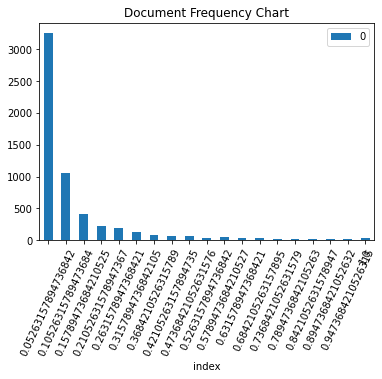

In [63]:
import matplotlib.pyplot as plot
# Draw a vertical bar chart

df_analysis.plot.bar(x="index", y=0, rot=65, title="Document Frequency Chart");

plot.show(block=True);

In [64]:
from sklearn.feature_extraction.text import CountVectorizer 

cv=CountVectorizer(stop_words=stop_words,ngram_range=(1,1),min_df =0.05263, max_df=1.0) # min_df =0.05263 # trying different things

word_count_vector=cv.fit_transform(sample_data_w_lemma)

/home/pawan/.local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ernst', 'ordnung', 'schluss'] not in stop_words.
  % sorted(inconsistent)


In [65]:
#the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'hochschule': 2244,
 'dezember': 1068,
 'promotion': 3537,
 'registrieren': 3711,
 'ebenfalls': 1175,
 'interesse': 2387,
 'promotionsbedingung': 3542,
 'promovierenden': 3571,
 'erfahren': 1376,
 'doppelbefragung': 1122,
 'vermeiden': 4692,
 'innerhalb': 2358,
 'fragebogen': 1765,
 'angegeben': 161,
 'antwort': 231,
 'zweck': 5193,
 'qualitätssicherung': 3642,
 'evaluation': 1497,
 'bereich': 657,
 'doktorandenausbildung': 1111,
 'einverständnis': 1273,
 'voraussetzen': 4817,
 'weitergabe': 4918,
 'angabe': 156,
 'einverstand': 1272,
 'anfang': 147,
 'offiziell': 3307,
 'doktorand': 1109,
 'registriert': 3712,
 'zwischenzeit': 5211,
 'ändern': 5222,
 'aktuell': 92,
 'zutreffen': 5178,
 'promovieren': 3569,
 'promotionsverfahren': 3564,
 'abschließen': 31,
 'promotionsvorhaben': 3565,
 'unterbrechen': 4548,
 'abbrechen': 2,
 'handeln': 2127,
 'gemeldet': 1929,
 'unterbrechung': 4549,
 'erinnern': 1413,
 'quartal': 3646,
 'arbeit': 248,
 'beginnen': 594,
 'zulassen': 5139,
 'darüb': 10

In [66]:
word_count_vector.shape
#We have 19 (rows) documents and 3003 unique words (columns)!
# With stopwords

(19, 5275)

In [67]:
cv.stop_words #gives you the stop words that CountVectorizer inferred from your min_df and max_df settings as well as those that were cut off during feature selection (through the use of max_features)

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)

tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [69]:
feature_names=cv.get_feature_names()

/home/pawan/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
# feature_names.index('mobilität')

In [71]:
# def sort_coo(coo_matrix):
#     tuples = zip(coo_matrix.col, coo_matrix.data)
#     return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

# def extract_topn_from_vector(feature_names, sorted_items, topn):
#     """get the feature names and tf-idf score of top n items"""
    
#     #use only topn items from vector
#     sorted_items = sorted_items[:topn]

#     score_vals = []
#     feature_vals = []
    
#     # word index and corresponding tf-idf score
#     for idx, score in sorted_items:
        
#         #keep track of feature name and its corresponding score
#         score_vals.append(round(score, 3))
#         feature_vals.append(feature_names[idx])

#     #create a tuples of feature,score
#     #results = zip(feature_vals,score_vals)
#     results= {}
#     for idx in range(len(feature_vals)):
#         results[feature_vals[idx]]=score_vals[idx]
    
#     return results

# def get_keywords(vectorizer, feature_names, doc):
#     """Return top k keywords from a doc using TF-IDF method"""

#     #generate tf-idf for the given document
#     tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
#     #sort the tf-idf vectors by descending order of scores
#     sorted_items=sort_coo(tf_idf_vector.tocoo())

#     #extract only TOP_K_KEYWORDS
#     keywords=extract_topn_from_vector(feature_names,sorted_items,400)
    
#     return (keywords)


In [72]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items

    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def get_keywords(vectorizer, feature_names, doc):
    """Return top k keywords from a doc using TF-IDF method"""

    #generate tf-idf for the given document
    tf_idf_vector = vectorizer.transform(cv.transform([doc]))
    
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extract only TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items)
    
    return (keywords)


In [73]:
result = []
for doc in sample_data_w_lemma:
    df = {}
    df['Text'] = doc
    df['top_keywords'] = get_keywords(tfidf_transformer, feature_names, doc)
    result.append(df)
    
final = pd.DataFrame(result)
final

,Text,top_keywords
0,der Hochschule an der ich im Dezember zur Prom...,"{'promotion': 0.371, 'betreuer': 0.19, 'thema'..."
1,wie sein dies studienvorbereitend Kurs verlauf...,"{'kurs': 0.468, 'vorbereitungskurs': 0.286, 'a..."
2,welch Studienabschluss haben ich in mein letzt...,"{'masterstudium': 0.572, 'studium': 0.294, 'ma..."
3,an welch Art Hochschule studieren ich . Univer...,"{'völlig': 0.532, 'lehnen': 0.303, 'akzeptiere..."
4,wie werden ich mein derzeitig Tätigkeit bzw . ...,"{'mitarbeiter': 0.301, 'weiterbildung': 0.234,..."
5,Ware oder sein ich seit der letzter Befragung ...,"{'letzter': 0.295, 'beruflich': 0.255, 'tätigk..."
6,wie zufried sein ich mit mein bisherig Bildung...,"{'studium': 0.424, 'aufnehmen': 0.201, 'berufl..."
7,In welch Sprache mögen ich der Befragung durch...,"{'value': 0.517, 'kollege': 0.183, 'difference..."
8,Ware oder sein ich seit der letzter Befragung ...,"{'weiterbildung': 0.282, 'ausland': 0.274, 'be..."
9,welch Abschluss streben ich in mein derzeitig ...,"{'berlin': 0.342, 'muenchen': 0.208, 'koeln': ..."


In [74]:
final['top_keywords'][0] # document 8 have 189 keywords(<topk(200)) and document 14 have 187 keywords

{'promotion': 0.371,
 'betreuer': 0.19,
 'thema': 0.161,
 'fakultät': 0.119,
 'quartal': 0.115,
 'aussage': 0.114,
 'folgend': 0.111,
 'wissenschaftlich': 0.11,
 'wissenschaft': 0.11,
 'sonstige': 0.109,
 'forschungs': 0.108,
 'hochschule': 0.106,
 'außerakademisch': 0.104,
 'vertrag': 0.101,
 'treffen': 0.1,
 'beratung': 0.097,
 'verfassen': 0.092,
 'selbstständigkeit': 0.092,
 'promotionsprogramm': 0.091,
 'stelle': 0.086,
 'bereich': 0.085,
 'entscheidungsprozess': 0.084,
 'betreuen': 0.083,
 'promovierende': 0.082,
 'coaching': 0.082,
 'eltern': 0.08,
 'bezug': 0.08,
 'außerhalb': 0.077,
 'tätigkeit': 0.077,
 'beruflich': 0.076,
 'positiv': 0.074,
 'teilnehmen': 0.074,
 'partner': 0.074,
 'sonstig': 0.073,
 'entwicklungsbezug': 0.073,
 'empfinden': 0.073,
 'promotionsverfahren': 0.073,
 'mitgliedschaft': 0.073,
 'karriereentwicklung': 0.073,
 'durchlaufen': 0.073,
 'auswahlverfahren': 0.073,
 'programm': 0.07,
 'forschungseinrichtung': 0.068,
 'arbeit': 0.067,
 'thematisch': 0.066,

In [75]:
final['Valid_Ground_Truth']= data ['Valid_Ground_Truth']

In [61]:
#for uniqueness

In [62]:
# #Calculating Document Frequency

# from collections import defaultdict
# import math

# DF2 = {}
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
#         tokens = nltk.word_tokenize(elem) #without nltk.word_tokenize, it gives character level DF
#         for w in tokens:
#             try:
#                 DF2[w].add(i)
#             except:
#                 DF2[w] = {i}

In [63]:
# DF2

In [64]:
# len(DF2)

In [65]:
# for word,freq in DF2.items():
#     print(word,len(freq))

In [66]:
# df_list1=[]
# for word,freq in DF2.items():
#     df_list1.append(tuple((word,len(freq)/19)))

In [67]:
# df_list1

In [68]:
# for uniquenees we can take the amount(count/Frequency) of documents that a keyword occurs in and then dividing it by the total amount of documents.(Document frequency)

# something that comes in 19 out of 19 questionnaire, we can be sure that it is not unique and something that comes in 1 out of 19 it’s very unique.

# we can define a threshold on document frquency and based on that can define the uniqueness/decisiveness of keyword
# for i in range(len(final)):
#     for elem in list((final['top_keywords'])[i].keys()):
        

In [92]:
final['Ground_Truth']= data['Ground_Truth']

In [94]:
final['Ground_Truth'][0]

"'wissenschaftssystem', 'betreuung', 'wissenschaftliche karriere', 'promotionsformen', 'promotionsmotive', 'vereinbarkeit von familie und beruf', 'monetäre erträge', 'nicht-monetäre erträge', 'wissenschaftlicher nachwuchs', 'promotionsabbruch', 'promovierende', 'promotion', 'strukturierte promotion', 'persönlichkeit', 'finanzierung', 'mobilität', 'gesundheit', 'erwerbsverläufe', 'arbeitsmarkterfolg innerhalb und außerhalb der wissenschaft', 'promovierte'"

In [77]:
# final.to_csv("keywords_After_POS.csv")

In [78]:
predicted=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(final['top_keywords'])):
    predicted.append([])           #used for nested list
    for j in range(1,int(len(final['top_keywords'][i])/chunk_size)+1):
        predicted[i].append(list(final['top_keywords'][i].keys())[0:j*chunk_size])

In [79]:
len(predicted[0])   #predicted[0][-1] shows all the keywords in document 0, that is 200 keywords

1113

In [82]:
# ground_truth =[]
# for i in range(len(gt)):
#     ground_truth.append([gt[i]])

In [84]:
# for i in range(len(ground_truth)):
#     ground_truth[i]= ground_truth[i][0].split(",")

In [89]:
# for i in range(len(ground_truth)):
#     for j in range(len(ground_truth[i])):
#         ground_truth[i][j] = ground_truth[i][j].strip()

In [87]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords(proposed,only_keywords):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(only_keywords)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [88]:
metric_values = []
for i in range(len(predicted)):
    metric_values.append([]) 
    for j in range(len(predicted[i])):
        metric_values[i].append(evaluate_keywords(predicted[i][j], only_keywords[i]))

In [81]:
precison_values = []

for i in range(len(metric_values)):
    precison_values.append([])
    for a_tuple in metric_values[i]:
        precison_values[i].append(a_tuple[0])

In [82]:
precison_values[0][690]

0.010130246020260492

In [83]:
recall_values = []
for i in range(len(metric_values)):
    recall_values.append([])
    for a_tuple in metric_values[i]:
        recall_values[i].append(a_tuple[1])

In [84]:
recall_values[0][690]

1.0

In [85]:
precison_values[0][-1]

0.006289308176100629

Graph for document 0


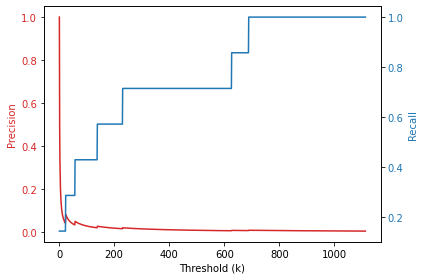

Graph for document 1


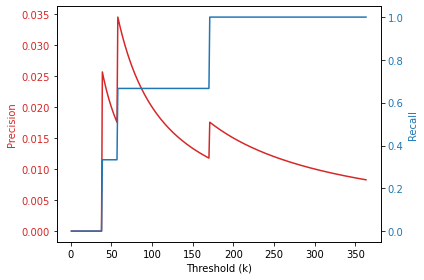

Graph for document 2


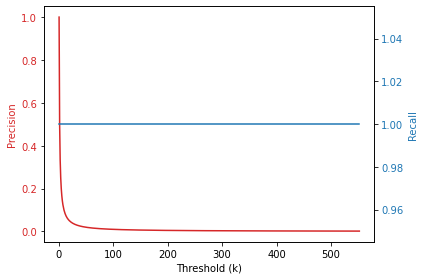

Graph for document 3


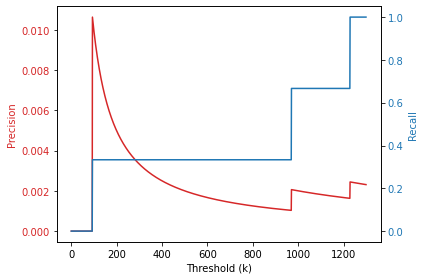

Graph for document 4


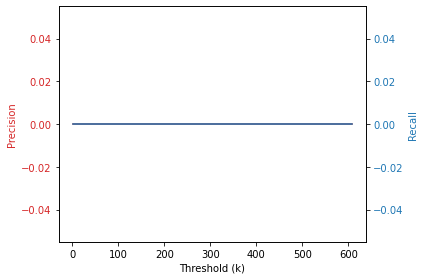

Graph for document 5


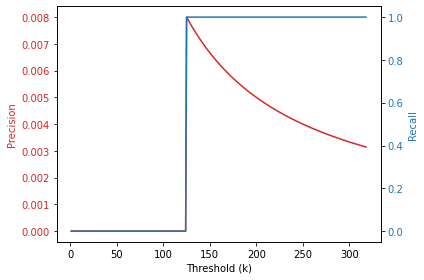

Graph for document 6


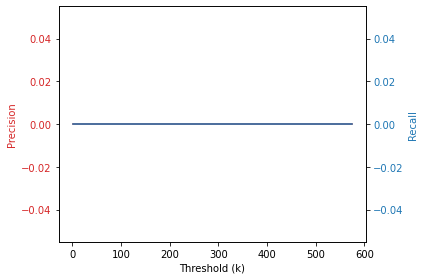

Graph for document 7


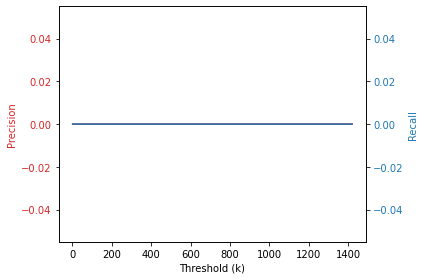

Graph for document 8


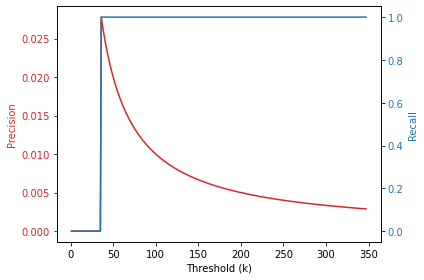

Graph for document 9


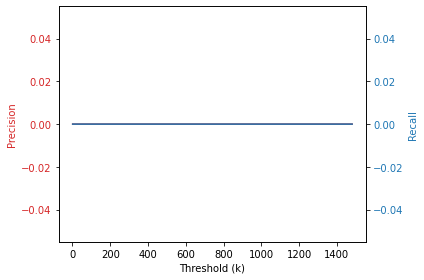

Graph for document 10


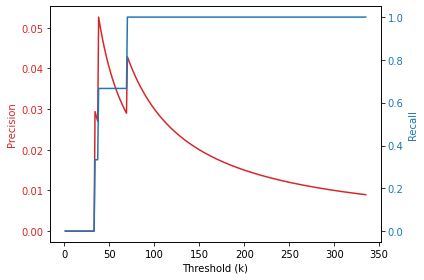

Graph for document 11


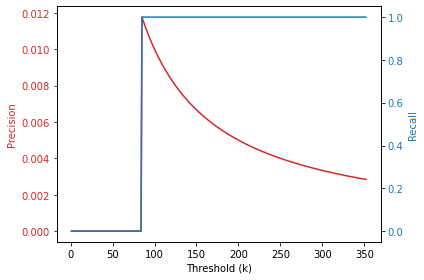

Graph for document 12


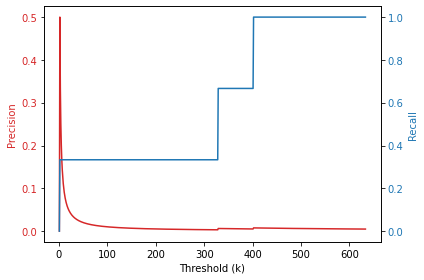

Graph for document 13


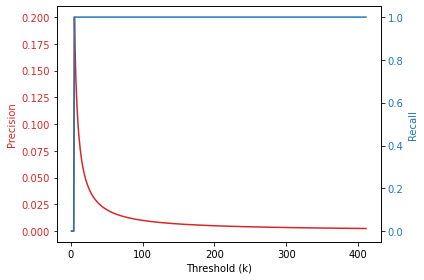

Graph for document 14


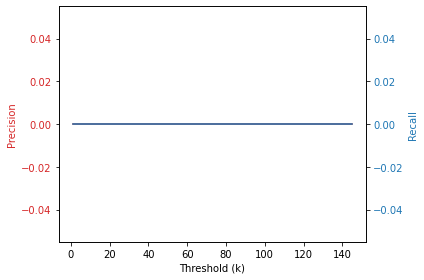

Graph for document 15


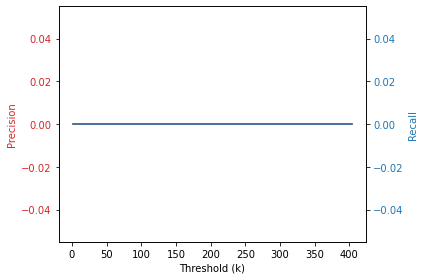

Graph for document 16


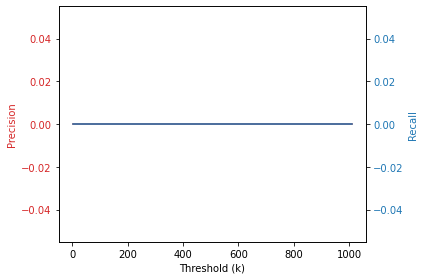

Graph for document 17


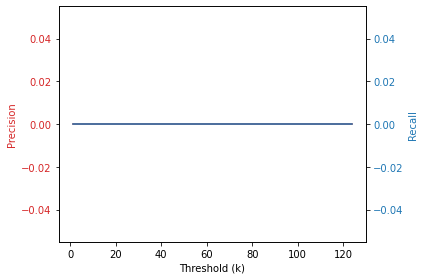

Graph for document 18


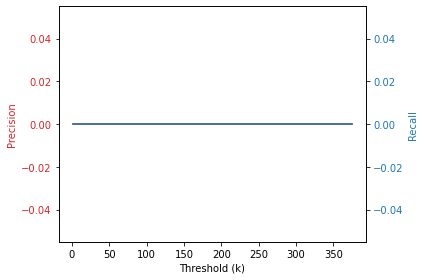

In [86]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values[i])+1))]
        data1 = precison_values[i]
        data2 = recall_values[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        fig.patch.set_visible(False)
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [87]:
a = list(final['top_keywords'][18])

In [88]:
a[:15]

['eltern',
 'vorlesungsfrei',
 'studium',
 'frühjahr',
 'studiengebühr',
 'erwerb',
 'kind',
 'finanziell',
 'mensa',
 'ausgabe',
 'bafög',
 'verdienst',
 'notwendig',
 'bar',
 'abschluss']

In [89]:
check_new = [elem for elem in list(final['top_keywords'][3])]
len(check_new)

1298

In [90]:
only_keywords[3]

['evaluation', 'qualifikation', 'studiensituation']

In [91]:
list(set(check_new).intersection(only_keywords[3]))

['evaluation', 'studiensituation', 'qualifikation']

In [92]:
check_new.index('qualifikation')

1227

In [93]:
# for every document : finding the location of best Recall values for first 15 document(top k for each doc)
# we are working on Recall because for DZHW , Recall is important

# Recall_Scores= recall_values[0:15]   #extracting Recall values of first 15 document(because we are also training on first 15 documents)

best_recall_indices = []
for i in range(len(recall_values)):
    best_recall_indices.append(recall_values[i].index(max(recall_values[i]))) #gives location for best recall_values for each documents

In [94]:
best_recall_indices # will give us index of best recall_values for each docuemnts, for example: for document 0, at index 168 we have the best recall value(check below for that particular value)

[688, 170, 0, 1227, 0, 124, 0, 0, 35, 0, 69, 84, 401, 4, 0, 0, 0, 0, 0]

In [95]:
best_recall_indices_element = []

for i in range(len(best_recall_indices)):
    Recall_values = recall_values[i]
    best_recall_indices_element.append(Recall_values[best_recall_indices[i]])

In [96]:
best_recall_indices_element

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [97]:
# for best Recall_score location, find tf-idf extracted keyword score(TF-IDF value) corresponding to it, extract for every document value at best location
Recall_score_tf_idf = []
for i in range(len(best_recall_indices)):
    tf_idf_values = list(final['top_keywords'][i].values())
    Recall_score_tf_idf.append(tf_idf_values[best_recall_indices[i]])
    

In [98]:
Recall_score_tf_idf

[0.01,
 0.023,
 0.572,
 0.007,
 0.301,
 0.033,
 0.424,
 0.517,
 0.072,
 0.342,
 0.057,
 0.044,
 0.016,
 0.179,
 0.368,
 0.493,
 0.239,
 0.496,
 0.234]

In [99]:
#mapping candidate keywords with thesaurus 
thesaurus_data = pd.read_csv("/home/pawan/THESOZ_Thesaurus.csv")

In [100]:
thesaurus_data

,key,value
0,1. Weltkrieg,Erster Weltkrieg
1,11. Jahrhundert,9999
2,11. September 2001,Attentat
3,11. September 2001,USA
4,11. September 2001,Terrorismus
...,...,...
14340,Übersiedler,9999
14341,Überstunden,9999
14342,Übertragung,9999
14343,Überwachung,9999


In [101]:
thesaurus_list=thesaurus_data.values.tolist()

In [102]:
thesaurus_list

[['1. Weltkrieg ', ' Erster Weltkrieg'],
 ['11. Jahrhundert', '9999'],
 ['11. September 2001 ', ' Attentat'],
 ['11. September 2001 ', ' USA'],
 ['11. September 2001 ', ' Terrorismus'],
 ['12. Jahrhundert', '9999'],
 ['13. Jahrhundert', '9999'],
 ['14. Jahrhundert', '9999'],
 ['15. Jahrhundert', '9999'],
 ['16. Jahrhundert', '9999'],
 ['17. Jahrhundert', '9999'],
 ['18. Jahrhundert', '9999'],
 ['19. Jahrhundert', '9999'],
 ['2. Weltkrieg ', ' Zweiter Weltkrieg'],
 ['20. Jahrhundert', '9999'],
 ['21. Jahrhundert', '9999'],
 ['68er-Bewegung ', ' Studentenbewegung'],
 ['Abbrecher', '9999'],
 ['Abduktion', '9999'],
 ['Abendroth, Wolfgang', '9999'],
 ['Abendschule', '9999'],
 ['Abenteuerfilm', '9999'],
 ['Abenteuerpädagogik ', ' Erlebnispädagogik'],
 ['Aberglaube', '9999'],
 ['Abfall', '9999'],
 ['Abfallbeseitigung', '9999'],
 ['Abfalltrennung', '9999'],
 ['Abfallverbrennung ', ' Abfallbeseitigung'],
 ['Abfallvermeidung', '9999'],
 ['Abfallverwertung', '9999'],
 ['Abfallwirtschaft', '9999']

In [103]:
#lowercase thesaurus words
new_thesaurus_list = []
for sublist in thesaurus_list:
    new_sublist = []
    for item in sublist:
        new_sublist.append(item.lower())
    new_thesaurus_list.append(new_sublist) 

In [104]:
new_thesaurus_list

[['1. weltkrieg ', ' erster weltkrieg'],
 ['11. jahrhundert', '9999'],
 ['11. september 2001 ', ' attentat'],
 ['11. september 2001 ', ' usa'],
 ['11. september 2001 ', ' terrorismus'],
 ['12. jahrhundert', '9999'],
 ['13. jahrhundert', '9999'],
 ['14. jahrhundert', '9999'],
 ['15. jahrhundert', '9999'],
 ['16. jahrhundert', '9999'],
 ['17. jahrhundert', '9999'],
 ['18. jahrhundert', '9999'],
 ['19. jahrhundert', '9999'],
 ['2. weltkrieg ', ' zweiter weltkrieg'],
 ['20. jahrhundert', '9999'],
 ['21. jahrhundert', '9999'],
 ['68er-bewegung ', ' studentenbewegung'],
 ['abbrecher', '9999'],
 ['abduktion', '9999'],
 ['abendroth, wolfgang', '9999'],
 ['abendschule', '9999'],
 ['abenteuerfilm', '9999'],
 ['abenteuerpädagogik ', ' erlebnispädagogik'],
 ['aberglaube', '9999'],
 ['abfall', '9999'],
 ['abfallbeseitigung', '9999'],
 ['abfalltrennung', '9999'],
 ['abfallverbrennung ', ' abfallbeseitigung'],
 ['abfallvermeidung', '9999'],
 ['abfallverwertung', '9999'],
 ['abfallwirtschaft', '9999']

In [105]:
len(final)

19

In [106]:
#mapping keyword from tfidf with thesaurus 

keywords_after_bruteforce_mapping=[]
for i in range(len(final)):
    keywords_after_bruteforce_mapping.append([])
    for elem in list((final['top_keywords'])[i].keys()):
        temp = [tuple((index1,index2))for index1,value1 in enumerate(new_thesaurus_list) for index2,value2 in enumerate(value1) if value2==elem]
        if (len(temp))!=0:
            for elem1 in temp:
                if elem1[1]==0:
                    if new_thesaurus_list[elem1[0]][1] == '9999':
                        keywords_after_bruteforce_mapping[i].append(elem)
                    else:
                        keywords_after_bruteforce_mapping[i].append(tuple((elem,new_thesaurus_list[elem1[0]][1])))
                        
                elif elem1[1]==1:
                    keywords_after_bruteforce_mapping[i].append(elem)
                    

In [142]:
#can you add tf-idf importance?
keywords_after_bruteforce_mapping[0]

['promotion',
 'aussage',
 'wissenschaft',
 'hochschule',
 'vertrag',
 'beratung',
 'entscheidungsprozess',
 'coaching',
 'eltern',
 'tätigkeit',
 'mitgliedschaft',
 'programm',
 'forschungseinrichtung',
 'arbeit',
 'karriere',
 'staatsangehörigkeit',
 'betreuung',
 'verhalten',
 'universität',
 'beruf',
 'informationsquelle',
 'ddr',
 'stiftung',
 'hochschullehrer',
 'kontakt',
 'kind',
 'forschungsprojekt',
 'nutzen',
 'beschäftigung',
 'förderung',
 'forschung',
 'statistik',
 'karriereplanung',
 'mentoring',
 'inhalt',
 'entwicklung',
 'projekt',
 'arbeitsvertrag',
 'deutschland',
 'gesundheit',
 'stipendium',
 'interesse',
 'familie',
 'entscheidungsfindung',
 'behinderung',
 'schreiben',
 'angebot',
 'kleinkind',
 'antrag',
 'wissenschaftler',
 'team',
 'schulabschluss',
 'leben',
 'verfahren',
 'mutterschutz',
 'messe',
 'konflikt',
 'kinderwunsch',
 'frau',
 'problem',
 'praxis',
 'finanzierung',
 'berufserfahrung',
 'erwerbstätigkeit',
 'arbeitslosengeld',
 'studium',
 'text',

In [108]:
# optimization.
stripped_new_thesaurus_list=[]
for i in range(len(new_thesaurus_list)):
        stripped_new_thesaurus_list.append([s.strip() for s in new_thesaurus_list[i]])

In [109]:
stripped_new_thesaurus_list

[['1. weltkrieg', 'erster weltkrieg'],
 ['11. jahrhundert', '9999'],
 ['11. september 2001', 'attentat'],
 ['11. september 2001', 'usa'],
 ['11. september 2001', 'terrorismus'],
 ['12. jahrhundert', '9999'],
 ['13. jahrhundert', '9999'],
 ['14. jahrhundert', '9999'],
 ['15. jahrhundert', '9999'],
 ['16. jahrhundert', '9999'],
 ['17. jahrhundert', '9999'],
 ['18. jahrhundert', '9999'],
 ['19. jahrhundert', '9999'],
 ['2. weltkrieg', 'zweiter weltkrieg'],
 ['20. jahrhundert', '9999'],
 ['21. jahrhundert', '9999'],
 ['68er-bewegung', 'studentenbewegung'],
 ['abbrecher', '9999'],
 ['abduktion', '9999'],
 ['abendroth, wolfgang', '9999'],
 ['abendschule', '9999'],
 ['abenteuerfilm', '9999'],
 ['abenteuerpädagogik', 'erlebnispädagogik'],
 ['aberglaube', '9999'],
 ['abfall', '9999'],
 ['abfallbeseitigung', '9999'],
 ['abfalltrennung', '9999'],
 ['abfallverbrennung', 'abfallbeseitigung'],
 ['abfallvermeidung', '9999'],
 ['abfallverwertung', '9999'],
 ['abfallwirtschaft', '9999'],
 ['abfindung',

In [149]:
#mapping keyword from tfidf with thesaurus 

keywords_after_optimization=[]
for i in range(len(final)):
    keywords_after_optimization.append([])
    for elem in list((final['top_keywords'])[i].items()):
        temp = [tuple((index1,index2))for index1,value1 in enumerate(new_thesaurus_list) for index2,value2 in enumerate(value1) if value2==elem[0]]
        if (len(temp))!=0:
            for elem1 in temp:
                if elem1[1]==0:
                    if new_thesaurus_list[elem1[0]][1] == '9999':
                        keywords_after_optimization[i].append((elem[0],elem[1]+1))
                    else:
                        keywords_after_optimization[i].append(tuple(((elem[0],elem[1]+1),(new_thesaurus_list[elem1[0]][1],1))))
                        
                elif elem1[1]==1:
                    keywords_after_optimization[i].append((elem[0],elem[1]+1))
        else:
            keywords_after_optimization[i].append((elem[0],elem[1]))

In [150]:
keywords_after_optimization_sorted = []
for j in range(len(keywords_after_optimization)):
        keywords_after_optimization_sorted.append(sorted(keywords_after_optimization[j],key=lambda x:(-x[1],x[0])))

In [185]:
keywords_after_optimization_sorted[0]

[('promotion', 1.371),
 ('aussage', 1.114),
 ('wissenschaft', 1.11),
 ('hochschule', 1.106),
 ('vertrag', 1.101),
 ('beratung', 1.097),
 ('entscheidungsprozess', 1.084),
 ('coaching', 1.082),
 ('eltern', 1.08),
 ('tätigkeit', 1.077),
 ('mitgliedschaft', 1.073),
 ('programm', 1.07),
 ('forschungseinrichtung', 1.068),
 ('arbeit', 1.067),
 ('karriere', 1.066),
 ('staatsangehörigkeit', 1.066),
 ('betreuung', 1.062),
 ('verhalten', 1.06),
 ('universität', 1.059),
 ('beruf', 1.053),
 ('ddr', 1.052),
 ('informationsquelle', 1.052),
 ('stiftung', 1.052),
 ('hochschullehrer', 1.05),
 ('kontakt', 1.049),
 ('forschungsprojekt', 1.046),
 ('kind', 1.046),
 ('beschäftigung', 1.045),
 ('nutzen', 1.045),
 ('forschung', 1.042),
 ('förderung', 1.042),
 ('karriereplanung', 1.042),
 ('statistik', 1.042),
 ('mentoring', 1.041),
 ('entwicklung', 1.039),
 ('inhalt', 1.039),
 ('arbeitsvertrag', 1.038),
 ('projekt', 1.038),
 ('deutschland', 1.037),
 ('gesundheit', 1.035),
 ('entscheidungsfindung', 1.033),
 ('f

In [168]:
predicted_new=[]
chunk_size = 1 #coz max ground truth size is 20
for i in range(len(keywords_after_optimization)):
    predicted_new.append([])           #used for nested list
    for j in range(1,int(len(keywords_after_optimization[i])/chunk_size)+1):
        predicted_new[i].append([elem[0] for elem in keywords_after_optimization[i]][0:j*chunk_size])

In [169]:
len(predicted_new[0])

1113

In [170]:
######################################################
# function to evaluate success of keyword extraction #
######################################################
def evaluate_keywords_new(proposed,only_keywords):
  """
  Returns precision, recall, and f1 score for proposed keywords against ground truth
  """
  proposed_set = set(proposed)
  true_set = set(only_keywords)
  
  true_positives = len(proposed_set.intersection(true_set))
  if len(proposed_set)==0:
    precision = 0
  else:
    # note denominator reflects total number of words
    # not total number of unique words
    precision = true_positives/float(len(proposed)) 
      
  if len(true_set)==0:
    recall = 0
  else:
    recall = true_positives/float(len(true_set))
  
  if precision + recall > 0:
    f1 = 2*precision*recall/float(precision + recall)
  else:
    f1 = 0

  return (precision, recall, f1)

In [171]:
metric_values_new = []
for i in range(len(predicted_new)):
    metric_values_new.append([]) 
    for j in range(len(predicted_new[i])):
        metric_values_new[i].append(evaluate_keywords_new(predicted_new[i][j], only_keywords[i]))

In [172]:
len(metric_values_new[0])

1113

In [173]:
precison_values_new = []
for i in range(len(metric_values_new)):
    precison_values_new.append([])
    for a_tuple in metric_values_new[i]:
        precison_values_new[i].append(a_tuple[0])

In [174]:
len(precison_values_new[0])

1113

In [175]:
precison_values_new[0]

[1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.2,
 0.16666666666666666,
 0.14285714285714285,
 0.125,
 0.1111111111111111,
 0.1,
 0.09090909090909091,
 0.08333333333333333,
 0.07692307692307693,
 0.07142857142857142,
 0.06666666666666667,
 0.0625,
 0.058823529411764705,
 0.05555555555555555,
 0.05263157894736842,
 0.05,
 0.047619047619047616,
 0.045454545454545456,
 0.043478260869565216,
 0.08333333333333333,
 0.08,
 0.07692307692307693,
 0.07407407407407407,
 0.07142857142857142,
 0.06896551724137931,
 0.06666666666666667,
 0.06451612903225806,
 0.0625,
 0.06060606060606061,
 0.058823529411764705,
 0.05714285714285714,
 0.05555555555555555,
 0.05405405405405406,
 0.05263157894736842,
 0.05128205128205128,
 0.05,
 0.04878048780487805,
 0.047619047619047616,
 0.046511627906976744,
 0.045454545454545456,
 0.044444444444444446,
 0.043478260869565216,
 0.0425531914893617,
 0.041666666666666664,
 0.04081632653061224,
 0.04,
 0.0392156862745098,
 0.038461538461538464,
 0.03773584905660377,
 0.03

In [176]:
recall_values_new = []
for i in range(len(metric_values_new)):
    recall_values_new.append([])
    for a_tuple in metric_values_new[i]:
        recall_values_new[i].append(a_tuple[1])

In [177]:
recall_values_new[0]

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.2857142857142857,
 0.28571428

Graph for document 0


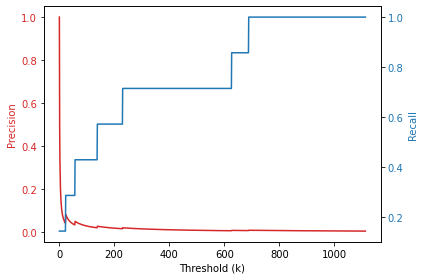

Graph for document 1


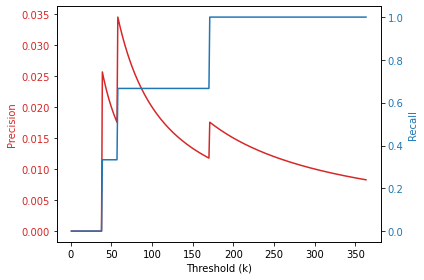

Graph for document 2


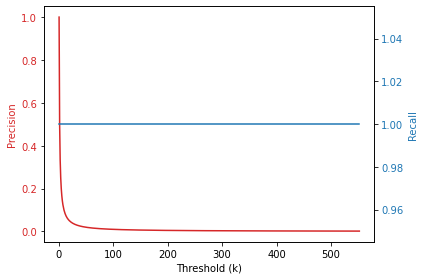

Graph for document 3


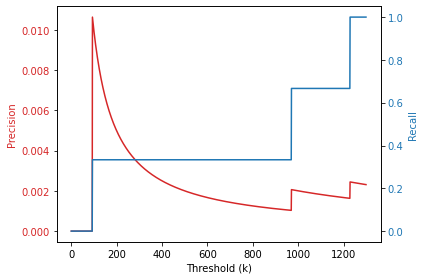

Graph for document 4


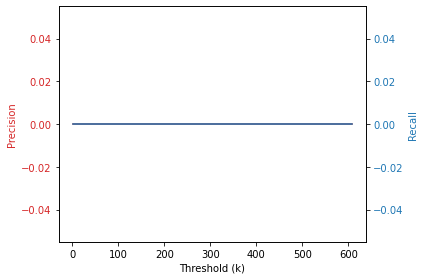

Graph for document 5


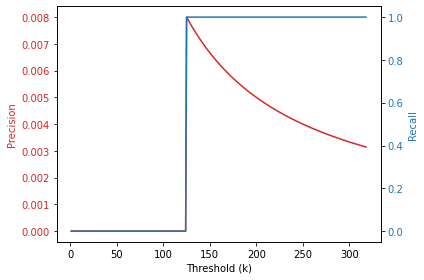

Graph for document 6


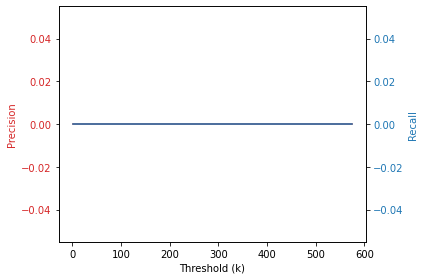

Graph for document 7


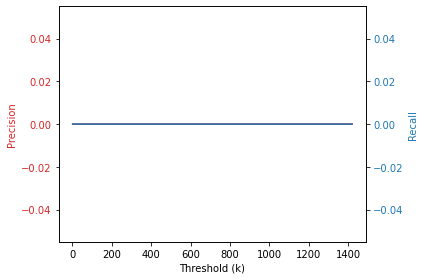

Graph for document 8


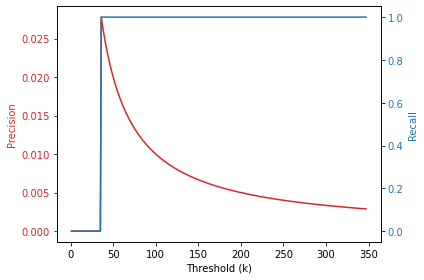

Graph for document 9


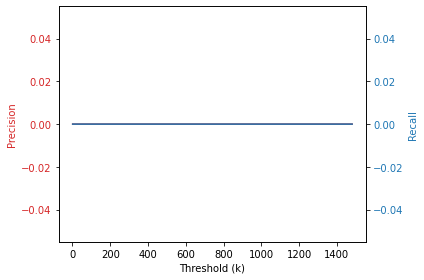

Graph for document 10


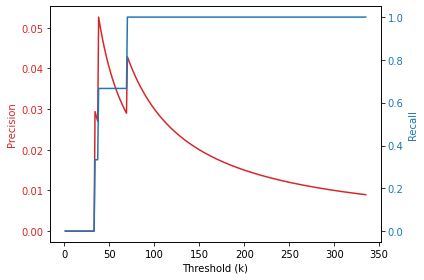

Graph for document 11


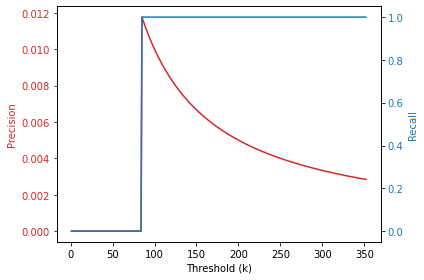

Graph for document 12


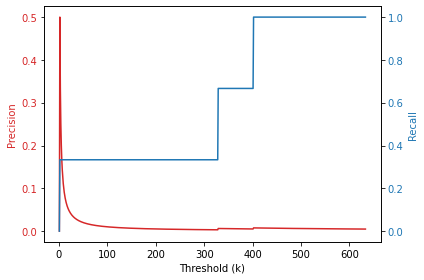

Graph for document 13


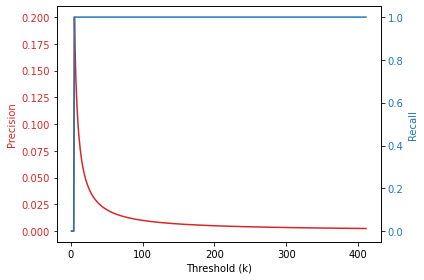

Graph for document 14


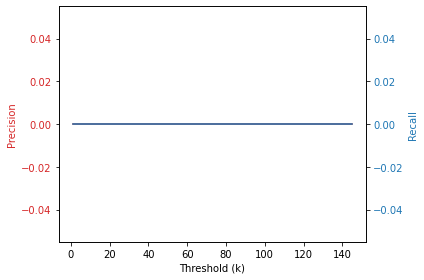

Graph for document 15


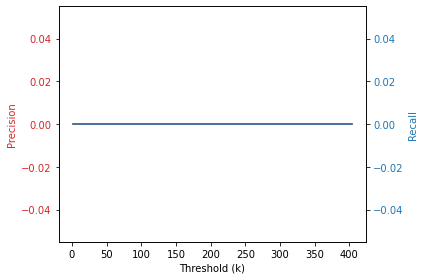

Graph for document 16


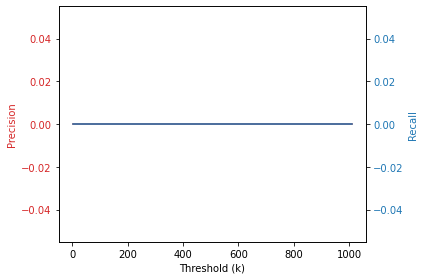

Graph for document 17


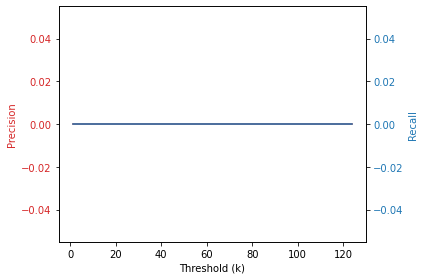

Graph for document 18


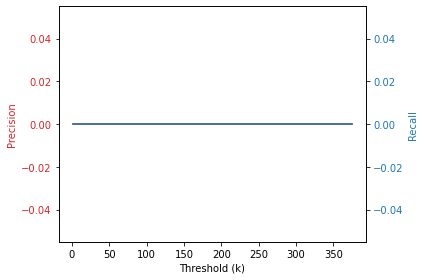

In [178]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


for i in range(len(precison_values_new)):
        print("Graph for document "+ str(i))
    
        # Create some mock data
        t = [x for x in range(1,(len(precison_values_new[i])+1))]
        data1 = precison_values_new[i]
        data2 = recall_values_new[i]

        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Threshold (k)')
        ax1.set_ylabel('Precision', color=color)
        ax1.plot(t, data1, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Recall', color=color)  # we already handled the x-label with ax1
        ax2.plot(t, data2, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        fig.patch.set_visible(False)
#         plt.savefig(str(i) + 'Document.png',  dpi=200)  #to save the plots
        plt.show()
      

In [186]:
check_new = [elem for elem in list(keywords_after_optimization_sorted[0])]
len(check_new)

1113

In [188]:
only_keywords[0]

['wissenschaftssystem',
 'betreuung',
 'promovierende',
 'promotion',
 'finanzierung',
 'mobilität',
 'gesundheit']

In [187]:
list(set(check_new).intersection(only_keywords[0]))

[]

In [181]:
best_recall_indices_new = []
for i in range(len(recall_values_new)):
    best_recall_indices_new.append(recall_values_new[i].index(max(recall_values_new[i])))

In [182]:
best_recall_indices_new

[688, 170, 0, 1227, 0, 124, 0, 0, 35, 0, 69, 84, 401, 4, 0, 0, 0, 0, 0]

In [183]:
best_recall_indices_element_new = []

for i in range(len(best_recall_indices_new)):
    Recall_values = recall_values_new[i]
    best_recall_indices_element_new.append(Recall_values[best_recall_indices_new[i]])

In [184]:
best_recall_indices_element_new

[1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [189]:
nlp('abc').similarity(nlp('abc')

SyntaxError: unexpected EOF while parsing (<ipython-input-189-3e115aab7d94>, line 1)